In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.io import wavfile
#from scipy.fftpack import fft

# FFT Calculation examples
It is important to note that the FFT does not produce an immediate physical significance. So we need to divide by the length of the signal, and only take half of the data (single-sided spectrum). From there we need to take the absolute value of the signal to ensure that no imaginary (complex, non-physical) values are present.

In [2]:
 # let's define a few utility functions

# This function normalises the input data and converts it to a float array
def normalise_audio(data):
    return np.float32(data / np.max(data))

# This funciton reads the audio file and extracts the signal
def read_audio_file(file_path, sample_for_seconds = 1):
    samplerate, data = wavfile.read(file_path)
    print (f'sample Rate is {samplerate}')
    data_n = normalise_audio(data[0:int(samplerate * sample_for_seconds)])
    # In case the is two-dimesional, we return only one channel
    return samplerate, data_n[:,0]

# This function calculates the Fourier Transform and cleasn the output signal
def calculate_fft(input_signal):
    # fourier transform and frequency domain
    Y_k_full = np.fft.fft(input_signal)
    # need to take the single-sided spectrum only
    sig_len = input_signal.size
    Y_k = Y_k_full[0:int(sig_len / 2)] / sig_len 
    Y_k[1:] = 2 * Y_k[1:] 
    # be sure to get rid of imaginary part
    return np.abs(Y_k)

# This function plots in log scale
def log_plot(signal, f_vec):
    fig,ax = plt.subplots()
    plt.plot(f_vec, signal, linewidth=5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency [Hz]')
    plt.show()

### Calculate the FFT of a sine wave
In this example we define a sinusoid with a given frequency and we plot it. Then, we calculate the FFT of the sinusoid.

For more details see https://makersportal.com/blog/2018/9/13/audio-processing-in-python-part-i-sampling-and-the-fast-fourier-transform

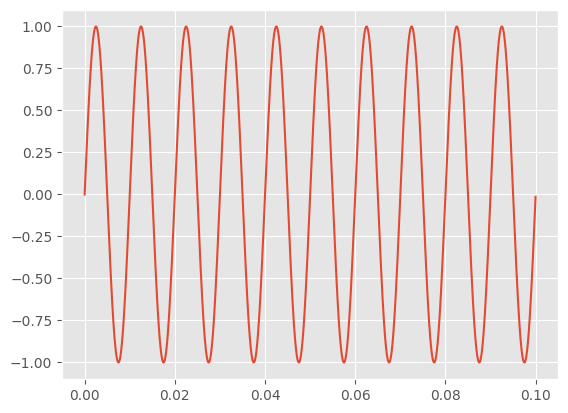

In [3]:
# sample rate
Fs = 44100
# sampling period
T = 1 / Fs
# seconds of sampling
t = 0.1
# total points in signal
N = Fs * t

# signal frequency in hertz
freq = 100
# angular frequency for sine waves
omega = 2 * np.pi * freq

t_vec = np.arange(N) * T # time vector for plotting
y = np.sin(omega * t_vec)

plt.plot(t_vec, y)
plt.show()

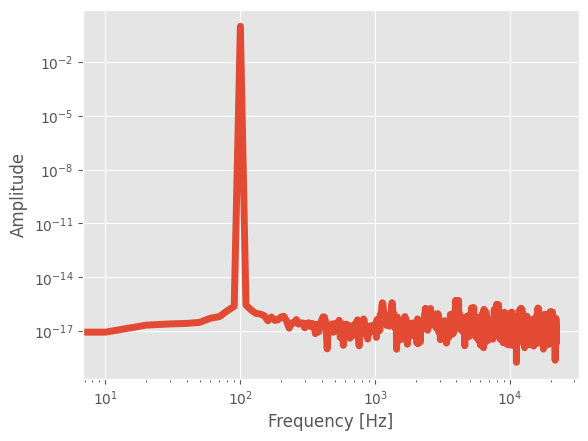

In [4]:
Pxx = calculate_fft(y)

# frequency vector
f = Fs * np.arange(N / 2) / N

# plotting
log_plot(Pxx, f)

### Calculate the FFT of a signal from a sound file
In this example we calculate the FFT of an audio file

Taken from https://stackoverflow.com/questions/69623300/python-fft-an-audio-file

sample Rate is 11025


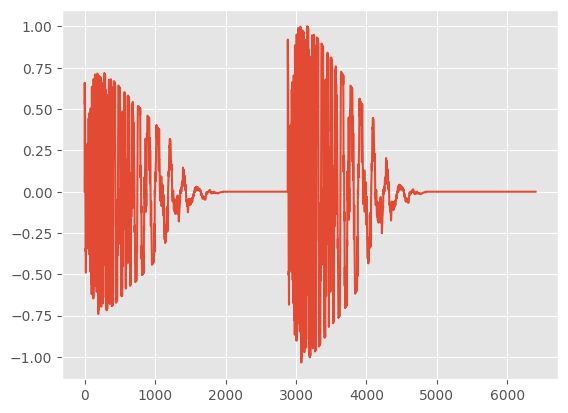

In [6]:
# FFT of a Wav file
samplerate, data = read_audio_file('Silencer-SoundBible.com-2147317264.wav')

# plot the time domain signal
plt.plot(data)
plt.show()

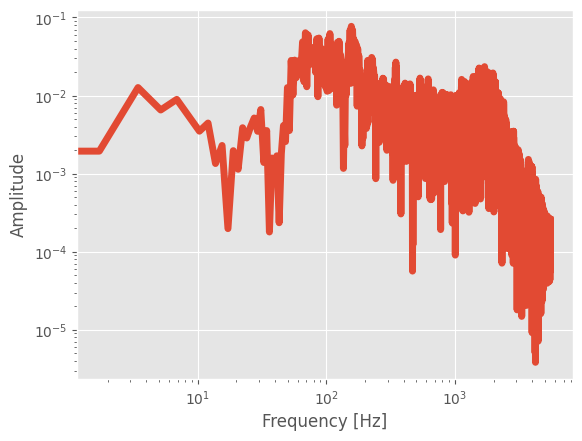

In [7]:
# Calculate FFT and plot it
fft_out = calculate_fft(data)

# frequency vector
f = samplerate * np.arange(data.size / 2) / data.size

# plot
log_plot(fft_out, f)